<h2>Your Name: Ammara Laeeq</h2>
<h2>Email: ammaramalik@gmail.com</h2>
<h4>Deadline: 08/12/2020 9:00 GMT + 3</h4>

# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

# Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
data["DataPlan"].value_counts()


0    2411
1     922
Name: DataPlan, dtype: int64

In [7]:
data["ContractRenewal"].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

# Exploratory Data Analysis

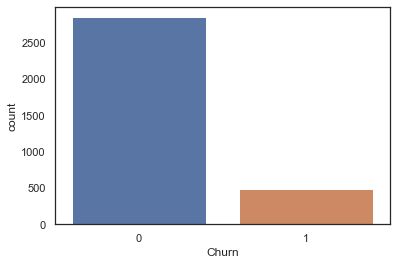

In [8]:
# Our label Distribution (countplot)
sns.set_theme(style="white")
ax = sns.countplot(x="Churn", data=data)

<p><b>Since we have an imbalanced dataset with respect to the class label, we will have to use undersampling or oversampling to make it a balanced dataset.</b></p>

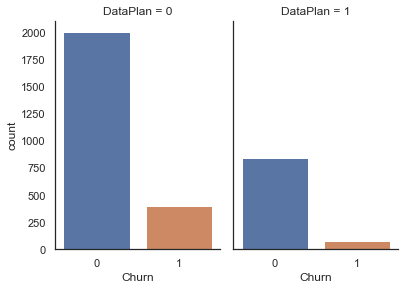

In [9]:
g = sns.catplot(x="Churn", col="DataPlan",
                data=data, kind="count",
                height=4, aspect=.7);

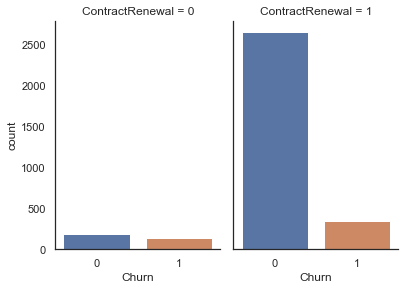

In [10]:
g = sns.catplot(x="Churn", col="ContractRenewal",
                data=data, kind="count",
                height=4, aspect=.7);

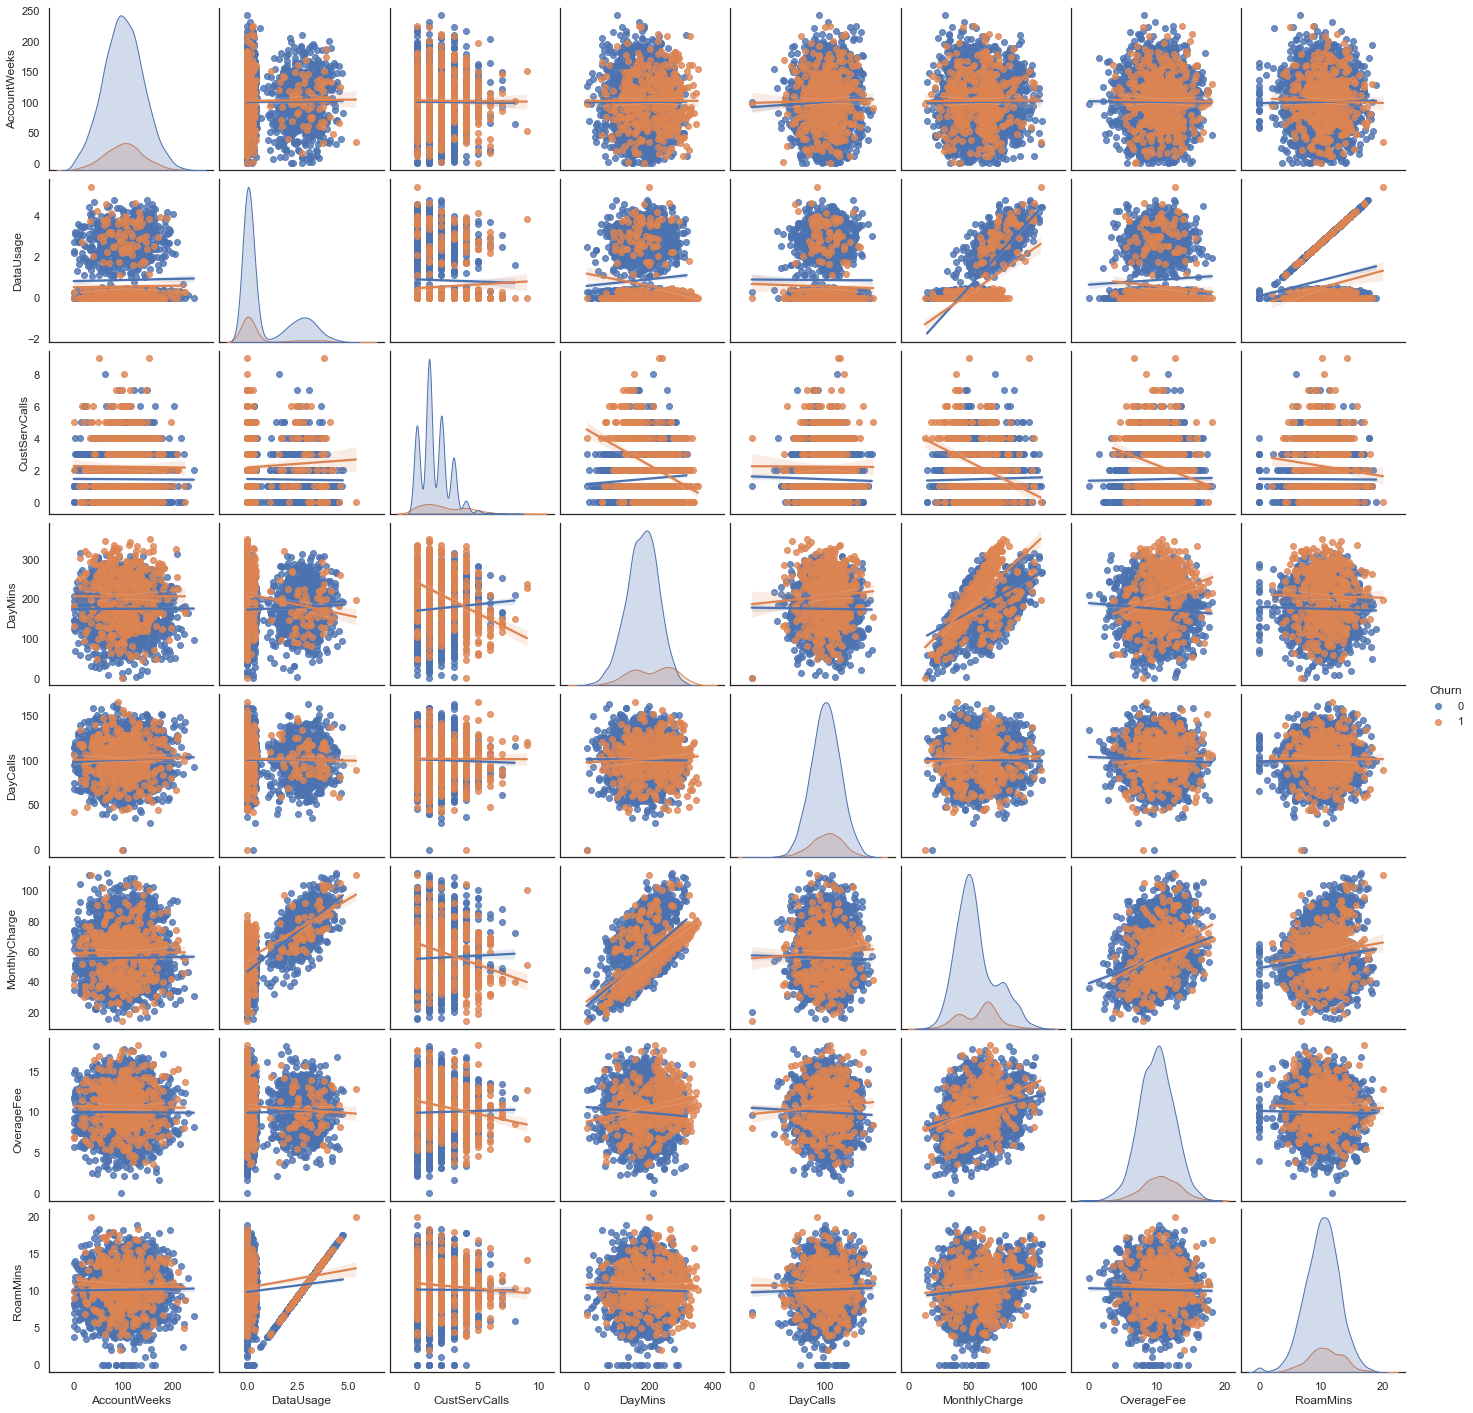

In [11]:
df = data.drop(["DataPlan", "ContractRenewal"], axis=1) #deleting binary columns
sns.pairplot(df, hue="Churn", kind="reg")

<AxesSubplot:xlabel='AccountWeeks', ylabel='Density'>

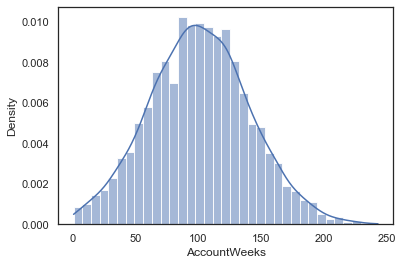

In [12]:
# Example EDA
sns.histplot(df['AccountWeeks'], kde=True, stat="density")

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [93]:
# Check for null values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [94]:
#Check for duplicate values
duplicateRowsDF = data[data.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []


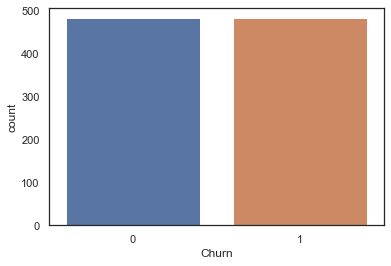

In [15]:
#Perform undersampling for Churn label 0
minority_class_count = data["Churn"].value_counts()[1]
majority_class_indices = data[data["Churn"] == 0].index
minority_class_indices = data[data["Churn"] == 1].index
random_majority_indices = np.random.choice(majority_class_indices, minority_class_count, replace=False)
undersample_indices = np.concatenate([minority_class_indices, random_majority_indices])
us_data = data.loc[undersample_indices]
ax = sns.countplot(x="Churn", data=us_data)


In [16]:
#Check for outliers
from scipy import stats
z = np.abs(stats.zscore(us_data))
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

24

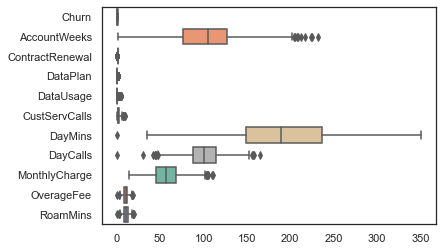

In [17]:
#Check for Scaling
ax = sns.boxplot(data=us_data, orient="h", palette="Set2")

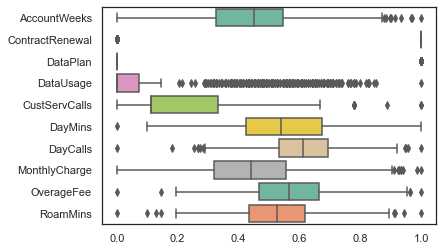

In [99]:
#Apply MinMax Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_us, y_us = us_data.iloc[: , 1:], us_data.iloc[: , 0]
X_scaled = MinMaxScaler().fit_transform(X_us)
X_us_scaled = pd.DataFrame(X_scaled, columns=X_us.columns)
bx = sns.boxplot(data=X_us_scaled, orient="h", palette="Set2")


<h1>Evaluation Metric</h1>
<p>Since we have balanced our dataset and have equal number of samples belonging to each class so <b>Accuracy</b> metric will be well suited here. Also, we can use <b>ROC curve and AUC</b> to check how much our model is capable of distinguishing between classes. ROC is a probability curve and AUC represents degree or measure of separability of calsses.</p>

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [101]:
#Logistic Regression without Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=123)
model = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(model, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.760432645034415
Test accuracy: 0.7689655172413793


Logistic Regression Confusion Matrix Without Scaling


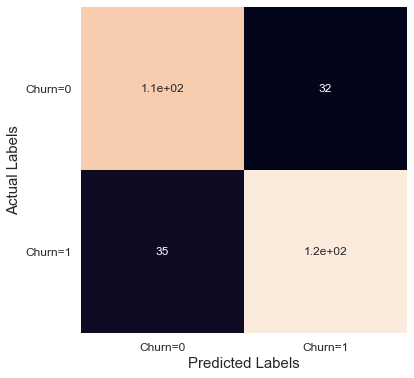

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       140
           1       0.78      0.77      0.77       150

    accuracy                           0.77       290
   macro avg       0.77      0.77      0.77       290
weighted avg       0.77      0.77      0.77       290

Accuracy: 0.7689655172413793
Precision: 0.782312925170068
Recall: 0.7666666666666667
F1 Score: 0.7744107744107744


In [102]:
#Metrics for Logistic Regression without Scaling
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
print("Logistic Regression Confusion Matrix Without Scaling")
plt.figure(figsize=(6, 6))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12)
ax.yaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred))
print("Recall:",recall_score(y_test,pred))
print("F1 Score:",f1_score(y_test,pred))

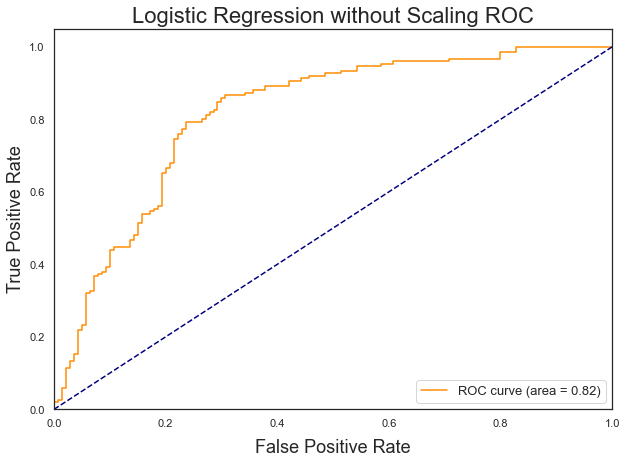

In [103]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = cv["estimator"][0].predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Logistic Regression without Scaling ROC',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [104]:
#Logistic Regression with Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_us_scaled, y_us, test_size=0.3, random_state=123)
model = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(model, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7707374631268437
Test accuracy: 0.7689655172413793


Logistic Regression Confusion Matrix With Scaling


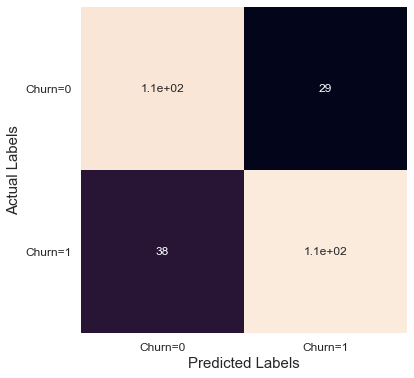

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       140
           1       0.79      0.75      0.77       150

    accuracy                           0.77       290
   macro avg       0.77      0.77      0.77       290
weighted avg       0.77      0.77      0.77       290

Accuracy: 0.7689655172413793
Precision: 0.7696463420438859
Recall: 0.7697619047619048
F1 Score: 0.7689627700686096


In [105]:
#Metrics for Logistic Regression with Scaling
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
print("Logistic Regression Confusion Matrix With Scaling")
plt.figure(figsize=(6, 6))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12)
ax.yaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average="macro"))
print("Recall:",recall_score(y_test,pred, average="macro"))
print("F1 Score:",f1_score(y_test,pred, average="macro"))

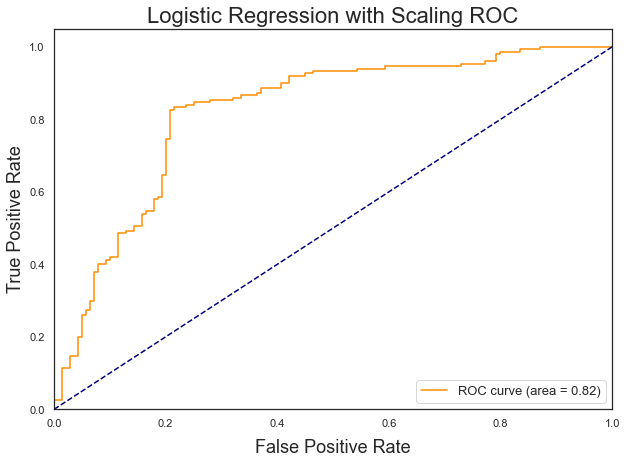

In [106]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = cv["estimator"][0].predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Logistic Regression with Scaling ROC',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [107]:
#Decision Trees without Scaling
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=123)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
cv = cross_validate(dt_clf, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print("Mean Accuracy of train:", np.mean(cv['test_score']))
print("Accuracy of test:", cv["estimator"][0].score(X_test,y_test))

Mean Accuracy of train: 0.8387872828580795
Accuracy of test: 0.8103448275862069


Decision Tree Confusion Matrix Without Scaling


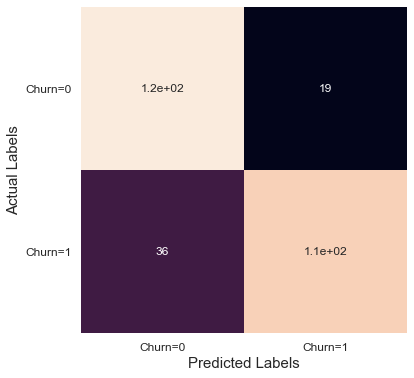

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       140
           1       0.86      0.76      0.81       150

    accuracy                           0.81       290
   macro avg       0.81      0.81      0.81       290
weighted avg       0.82      0.81      0.81       290

Accuracy: 0.8103448275862069
Precision: 0.8139217470427662
Recall: 0.8121428571428572
F1 Score: 0.8102342625310823


In [108]:
#Metrics for Decision Tree without Scaling
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
print("Decision Tree Confusion Matrix Without Scaling")
plt.figure(figsize=(6, 6))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12)
ax.yaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

#from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average="macro"))
print("Recall:",recall_score(y_test,pred, average="macro"))
print("F1 Score:",f1_score(y_test,pred, average="macro"))

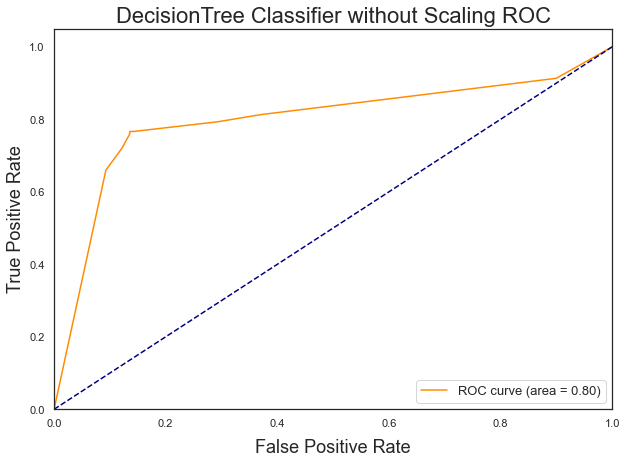

In [109]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = cv["estimator"][0].predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('DecisionTree Classifier without Scaling ROC',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [110]:
#Decision Trees with Scaling
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_us_scaled, y_us, test_size=0.3, random_state=123)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
cv = cross_validate(dt_clf, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print("Mean Accuracy of train:", np.mean(cv['test_score']))
print("Accuracy of test:", cv["estimator"][0].score(X_test,y_test))

Mean Accuracy of train: 0.8373058013765978
Accuracy of test: 0.8103448275862069


Decision Tree Confusion Matrix With Scaling


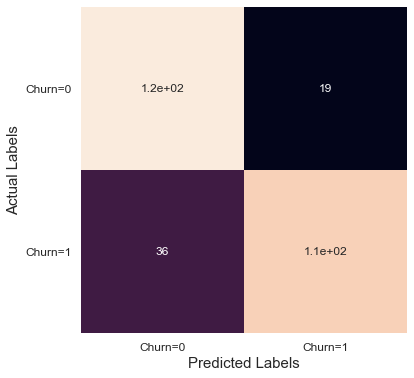

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       140
           1       0.86      0.76      0.81       150

    accuracy                           0.81       290
   macro avg       0.81      0.81      0.81       290
weighted avg       0.82      0.81      0.81       290

Accuracy: 0.8103448275862069
Precision: 0.8139217470427662
Recall: 0.8121428571428572
F1 Score: 0.8102342625310823


In [111]:
#Metrics for Decision Tree with Scaling
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
print("Decision Tree Confusion Matrix With Scaling")
plt.figure(figsize=(6, 6))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12)
ax.yaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

#from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average="macro"))
print("Recall:",recall_score(y_test,pred, average="macro"))
print("F1 Score:",f1_score(y_test,pred, average="macro"))

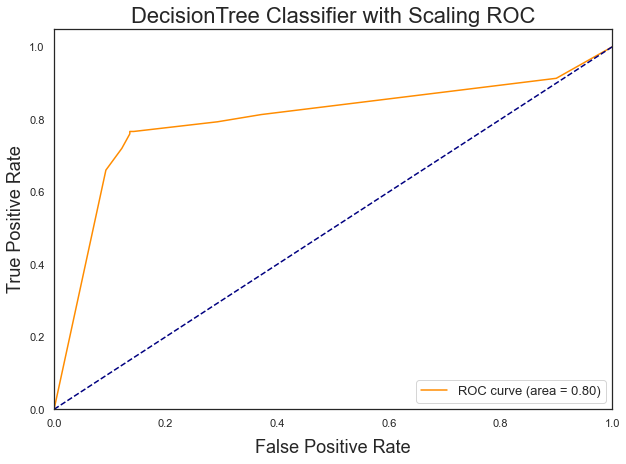

In [114]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = cv["estimator"][0].predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('DecisionTree Classifier with Scaling ROC',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [125]:
#Support Vector Machines without Scaling
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=123)
svm_clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel
cv = cross_validate(svm_clf, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print("Mean Accuracy of train:", np.mean(cv['test_score']))
print("Accuracy of test:", cv["estimator"][0].score(X_test,y_test))


Mean Accuracy of train: 0.7722386102917076
Accuracy of test: 0.7586206896551724


Support Vector Classifier Confusion Matrix Without Scaling


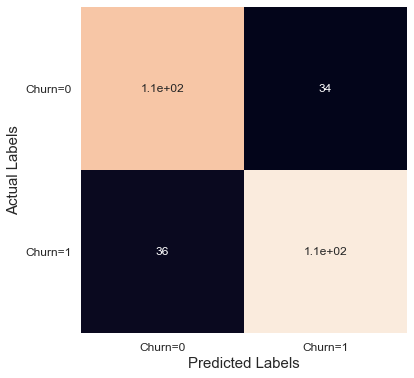

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       140
           1       0.77      0.76      0.77       150

    accuracy                           0.76       290
   macro avg       0.76      0.76      0.76       290
weighted avg       0.76      0.76      0.76       290

Accuracy: 0.7586206896551724
Precision: 0.7583745717548535
Recall: 0.7585714285714286
F1 Score: 0.7584368603931648


In [126]:
#Metrics for Support Vector Classifier without Scaling
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
print("Support Vector Classifier Confusion Matrix Without Scaling")
plt.figure(figsize=(6, 6))
np.set_printoptions(precision=2)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12)
ax.yaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

print(classification_report(y_test, cv["estimator"][0].predict(X_test)))
print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average="macro"))
print("Recall:",recall_score(y_test,pred, average="macro"))
print("F1 Score:",f1_score(y_test,pred, average="macro"))

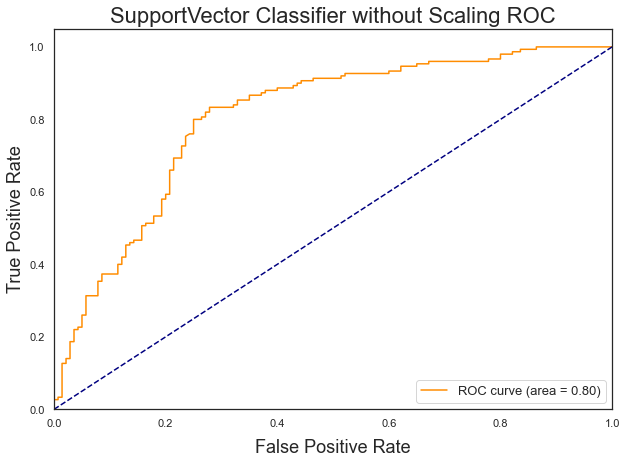

In [127]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = cv["estimator"][0].predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('SupportVector Classifier without Scaling ROC',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [128]:
#Support Vector Machines with Scaling
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X_us_scaled, y_us, test_size=0.3, random_state=123)
svm_clf = svm.SVC(kernel='poly', probability=True) # Linear Kernel
cv = cross_validate(svm_clf, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)
print("Mean Accuracy of train:", np.mean(cv['test_score']))
print("Accuracy of test:", cv["estimator"][0].score(X_test,y_test))


Mean Accuracy of train: 0.8372992461488037
Accuracy of test: 0.8206896551724138


Support Vector Classifier Confusion Matrix With Scaling


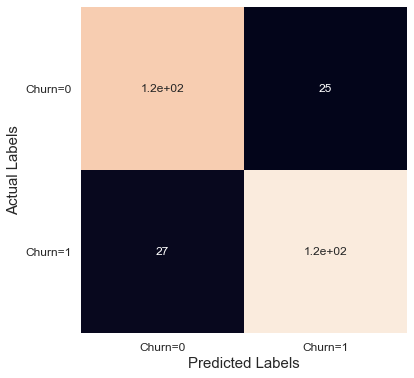

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       140
           1       0.83      0.82      0.83       150

    accuracy                           0.82       290
   macro avg       0.82      0.82      0.82       290
weighted avg       0.82      0.82      0.82       290

Accuracy: 0.8206896551724138
Precision: 0.8204701180053293
Recall: 0.8207142857142857
F1 Score: 0.8205530962920653


In [129]:
#Metrics for Support Vector Classifier with Scaling
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
print("Support Vector Classifier Confusion Matrix With Scaling")
plt.figure(figsize=(6, 6))
np.set_printoptions(precision=2)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12)
ax.yaxis.set_ticklabels(["Churn=0","Churn=1"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

print(classification_report(y_test, cv["estimator"][0].predict(X_test)))
print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred, average="macro"))
print("Recall:",recall_score(y_test,pred, average="macro"))
print("F1 Score:",f1_score(y_test,pred, average="macro"))

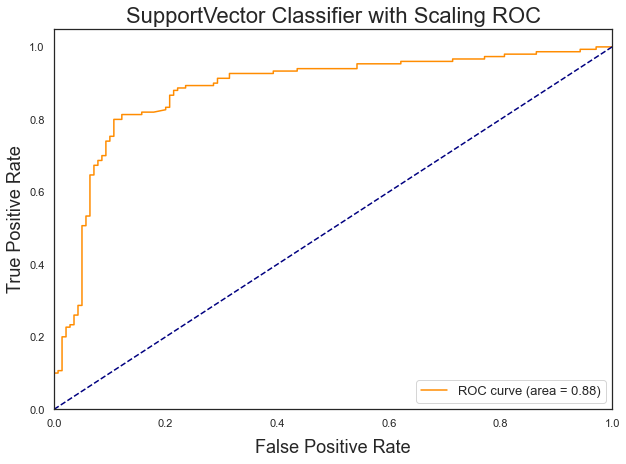

In [130]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = cv["estimator"][0].predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('SupportVector Classifier with Scaling ROC',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
<p>According to the Accuracy and  ROC curve and AUC evaluation metrics, the best performing model is Support Vector Classifier when dataset has been scaled and polynomial kernel is used with three degrees. The area under the ROC curve is 0.88 in this case which is highest from all the models investigated above. Also AUC between 0.8 and 0.9 is considered to be excellent. Also Accuracy metric is 0.82 which is also highest from all models. The training accuracy is 0.84 and thus variance between training and test scores is just 0.02 which is not very much. </p>

- Analyse results and make comment about how you can improve model performance.
<p>The other better performing model is Decision Tree Classifier. Its accuracy is 0.81 irrespective of training dataset scaling. Decision Tree Classifier has also shown 0.02 variance between training and test scores.</p>
<p>The Logistic Regression model is not performing well for this dataset. The Accuracy score, in case of logistic regression, is 0.76 irrespective of dataset scaling. The variance between training and test scores is minimal which indicates underfitting. </p>

# Improvements:

- We can try reducing the input features as we have DataPlan and ContractRenewal columns with binary values only and these columns does not seem to be useful in calssification. For example, the count of samples where ContractRenewal is 0 samples is very less as compared to those with 1. So we can assume this 1 for all samples while ignoring those with 0.
- If we examine CustServCalls feature plot in pairplot above, we can see multiple peaks in the curve. This feature has discrete values in the range 0-9. I think we can try binning for this feature.
- We can try Standard Scaler for all the continous features in the data set to see its effect. 
- I have used undersampling of majority class to make class labels balanced. Another option is to use oversampling of minority class or try building models with the imbalanced data.
- To improve logistic regression, we can try filtering out outliers and feature engineering to avoid underfitting.